In [2]:
library('igraph')
library('Matrix')
library('pracma')

In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [4]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

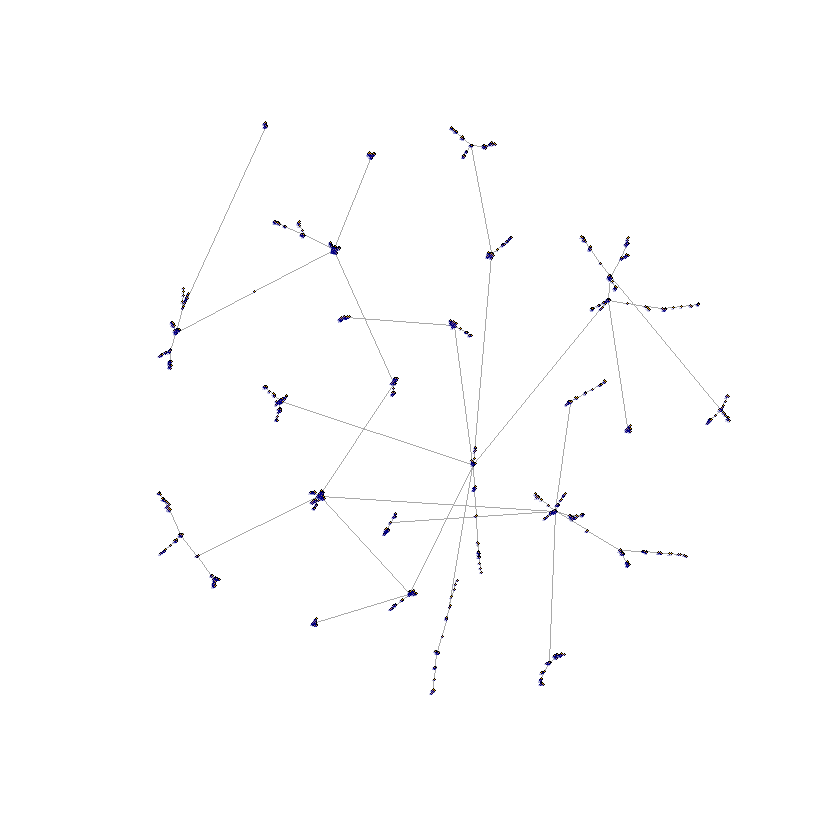

In [8]:
#2.2a
g=barabasi.game(1000,directed=F)
plot(g,vertex.size=1,vertex.label.cex=0.1)

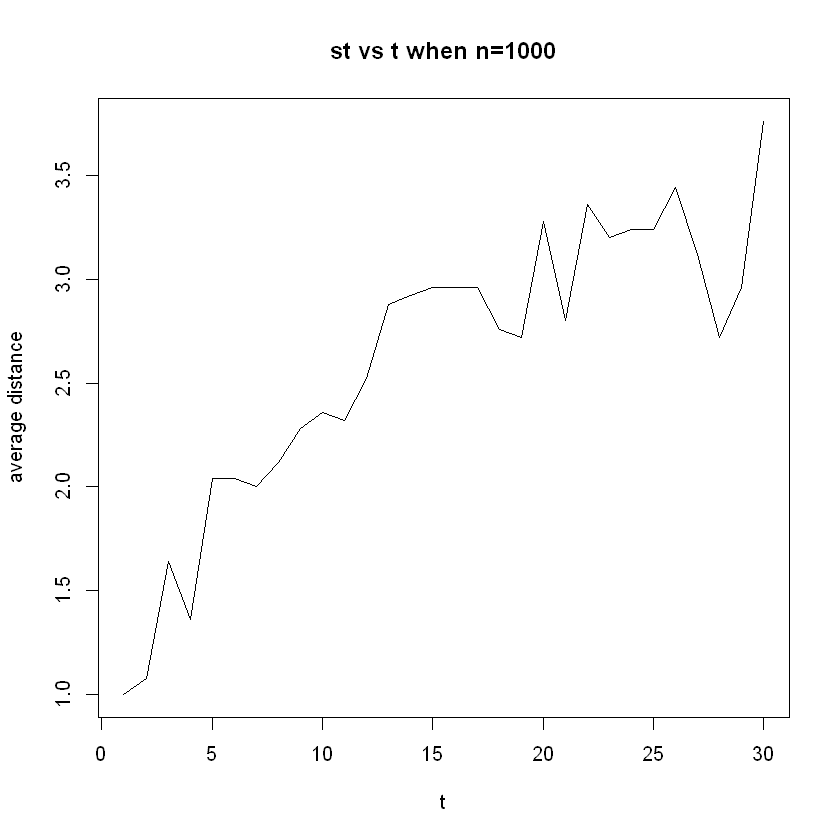

In [9]:
#2.2b
st <- numeric()
variance <- numeric()
t_value<-seq(1,30,1)
matrix<-create_transition_matrix(g)
paths<-shortest.paths(g)
sample<-50
for (t in t_value){
    st_temp<-numeric()
    sample_temp<-sample(1:1000,sample)
    for (s in sample_temp){
        v<-random_walk(g,t,s,matrix)
        st_temp<-c(st_temp,paths[s,v])
    }
    st<-c(st,mean(st_temp))
    variance<-c(variance,var(st_temp))
}
plot(t_value,st,typ="l",main="st vs t when n=1000",xlab="t",ylab="average distance")

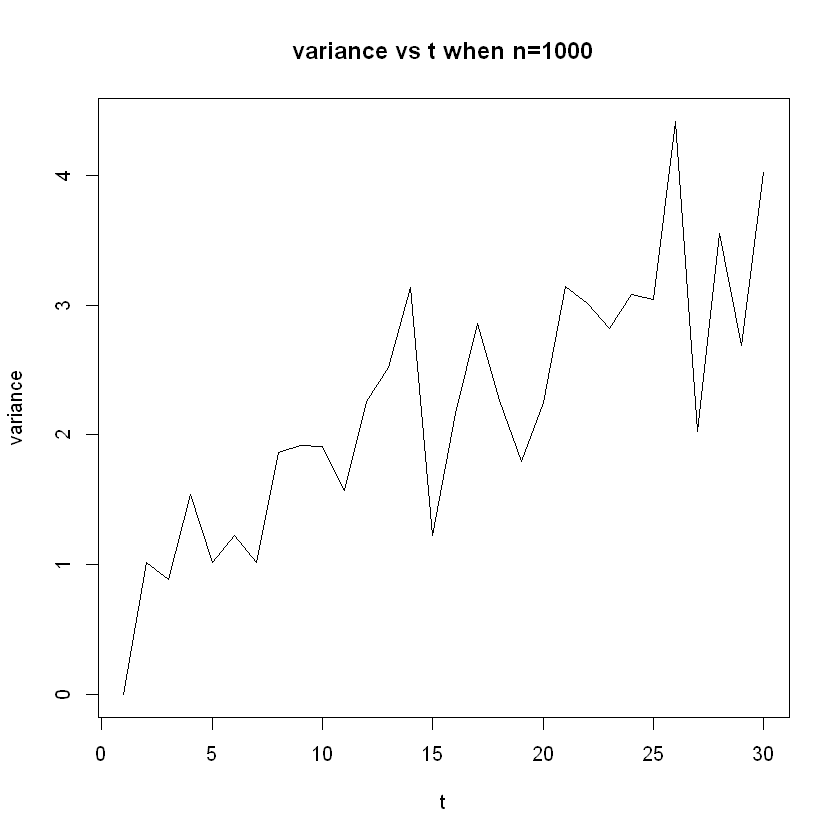

In [10]:
plot(t_value,variance,typ="l",main="variance vs t when n=1000",xlab="t",ylab="variance")

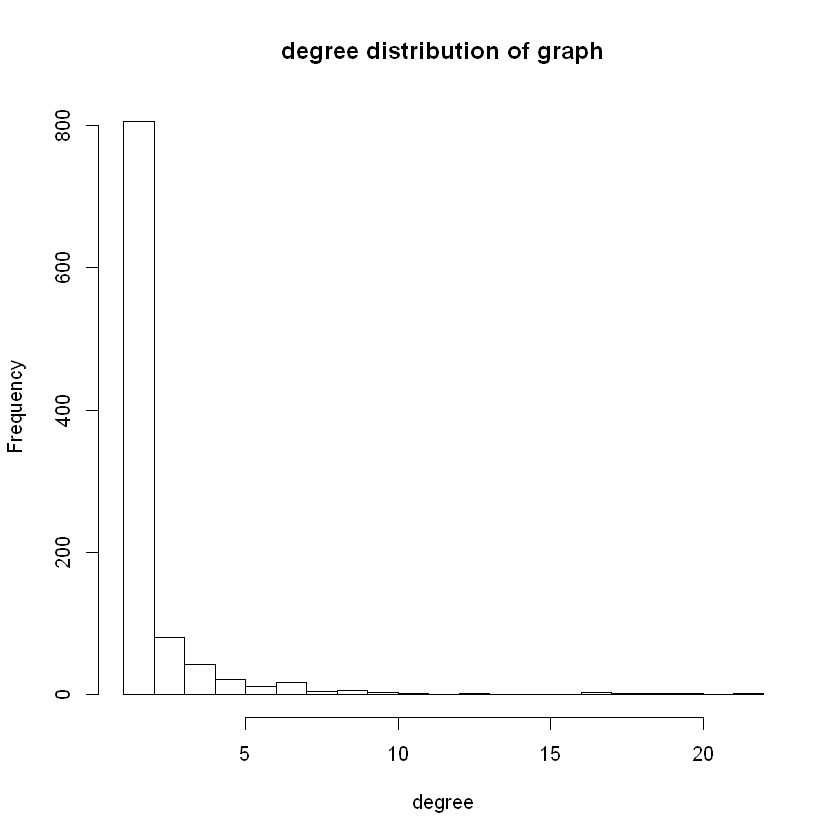

In [11]:
#2.2c
degree<-degree(g)
hist(degree,seq(min(degree),max(degree),1),main="degree distribution of graph",xlab="degree")

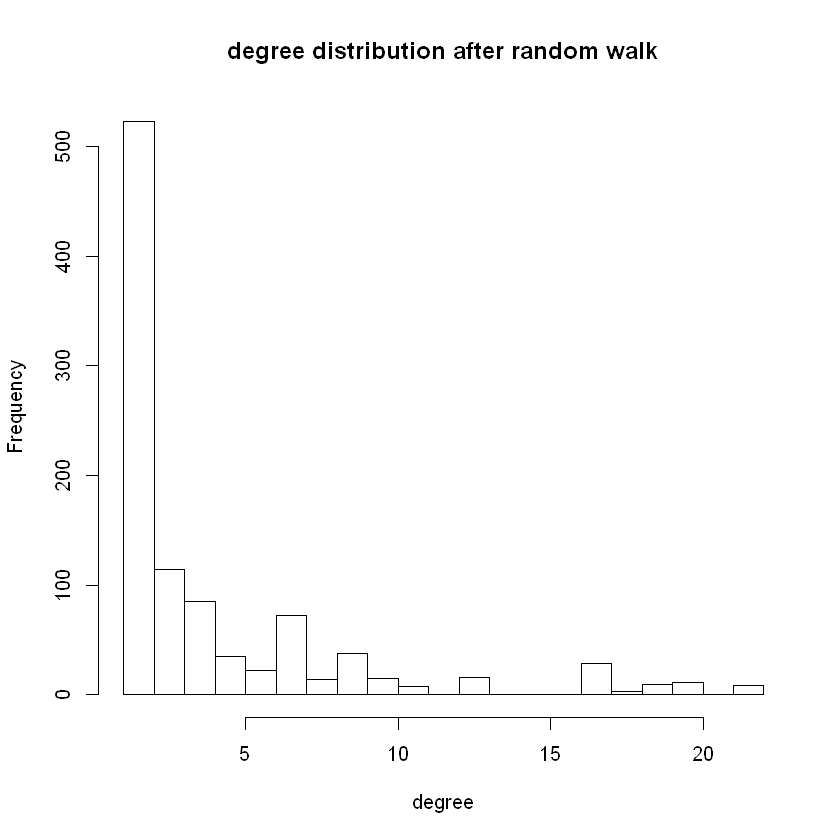

In [12]:
t_temp<-15
sample_degree<-numeric()
sample<-1000
for (s in 1:sample){
    v<-random_walk(g,t,s,matrix)
    sample_degree<-c(sample_degree,degree[v])
}
hist(sample_degree,seq(min(sample_degree),max(sample_degree),1),main="degree distribution after random walk",xlab="degree")

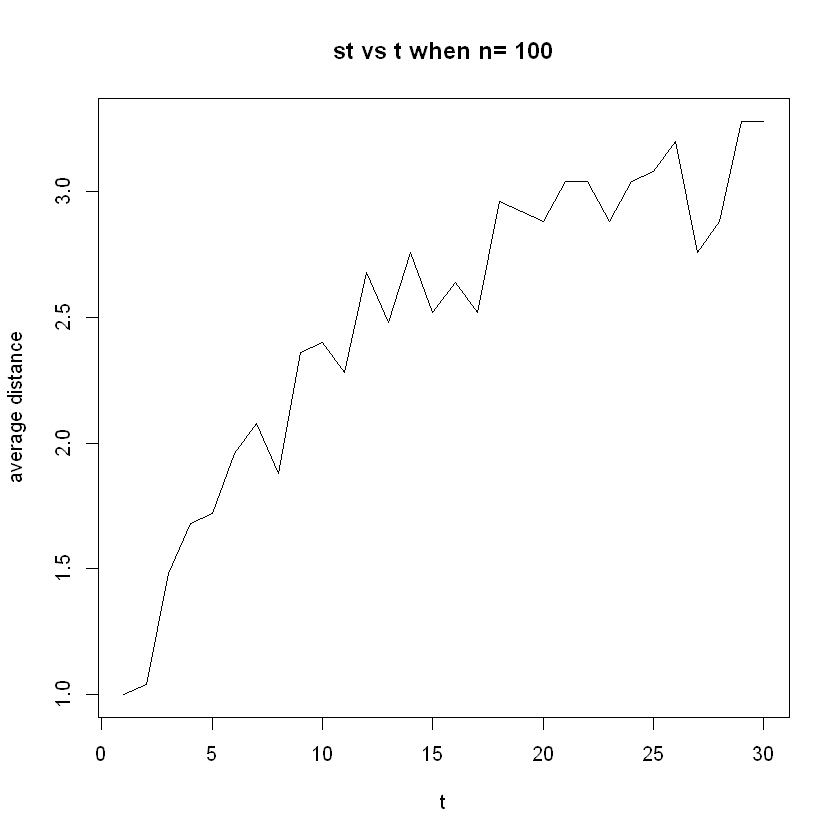

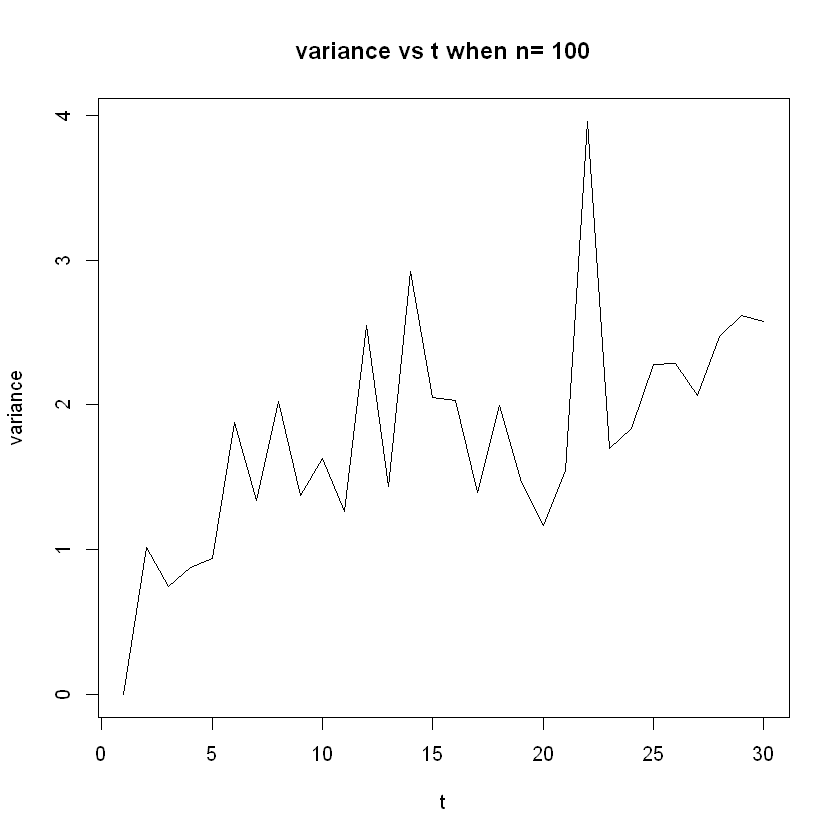

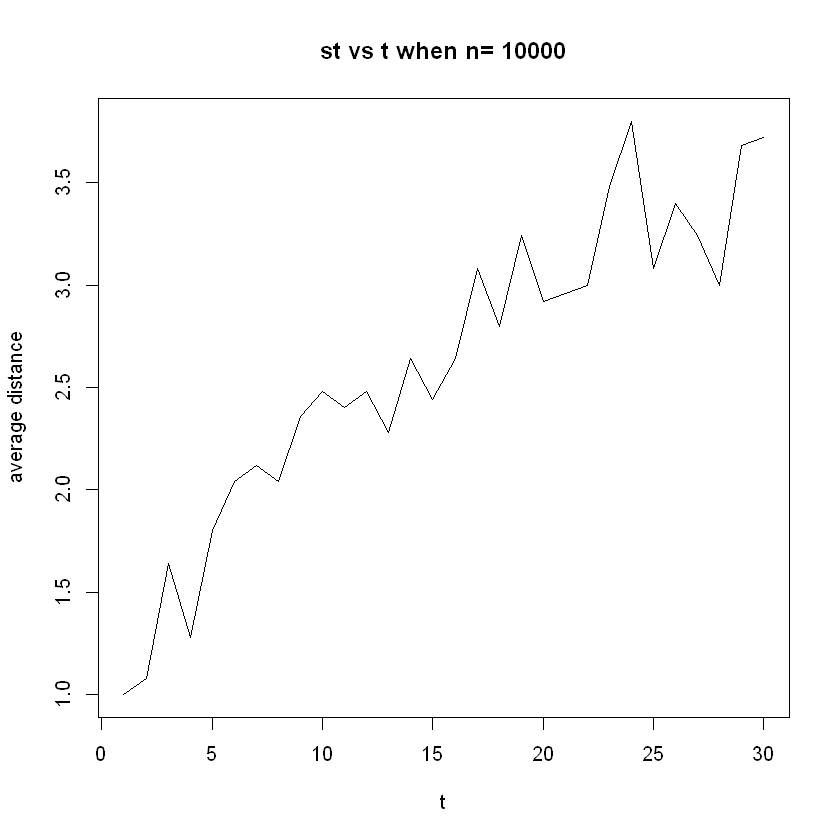

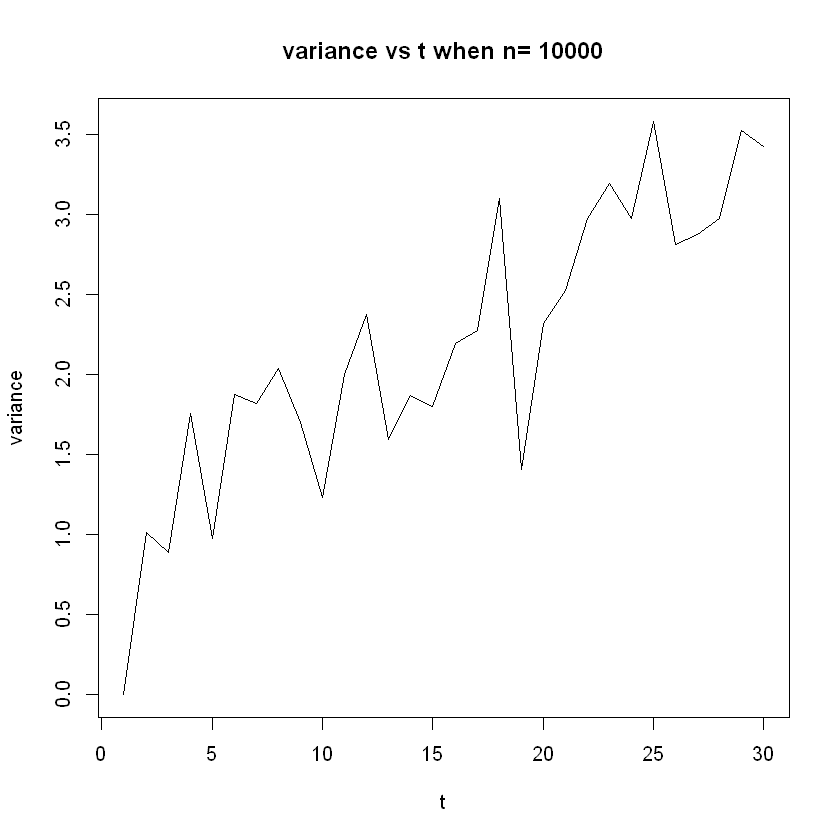

In [13]:
#2.2d
node_list=list(100,10000)
for(i in node_list){
    g <-barabasi.game(i,directed=F)
    st <- numeric()
    variance <- numeric()
    t_value<-seq(1,30,1)
    matrix<-create_transition_matrix(g)
    paths<-shortest.paths(g)
    sample<-50
    for (t in t_value){
        st_temp<-numeric()
        sample_temp<-sample(1:i,sample)
        for (s in sample_temp){
            v<-random_walk(g,t,s,matrix)
            st_temp<-c(st_temp,paths[s,v])
        }
        st<-c(st,mean(st_temp))
        variance<-c(variance,var(st_temp))
    }
    plot(t_value,st,typ="l",main=paste("st vs t when n=",i),xlab="t",ylab="average distance")
    plot(t_value,variance,typ="l",main=paste("variance vs t when n=",i),xlab="t",ylab="variance")
}